In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")

In [4]:
import os
os.chdir("..")

In [5]:
dataset_name = "mnist"
# dataset_name = "cifar10"
df = pd.read_csv(f"results/{dataset_name}_data_effect.csv")
# round size to int
df['size'] = df['size'].astype(int)
df['seed'] = df['seed'].astype(int)
df['num_cls_per_task'] = df['num_cls_per_task'].astype(int)
df

,seed,size,num_cls_per_task,test_acc,val_acc
0,2,128,2,0.978649,0.964844
1,2,128,4,0.914160,0.908203
2,2,128,8,0.912032,0.895508
3,2,128,10,0.906200,0.899219
4,2,256,2,0.997638,0.996094
...,...,...,...,...,...
75,4,512,10,0.961300,0.956445
76,4,1024,2,0.993056,0.991697
77,4,1024,4,0.983120,0.987085
78,4,1024,8,0.973661,0.975092


In [8]:
df[(df["size"] == 128) & (df["num_cls_per_task"] == 10)]["test_acc"].mean()

0.9106199860572814

In [8]:
# rename size to data size
df = df.rename(columns={"size": "data size"})

In [9]:
# sizes = [128, 256, 512, 1024]
sizes = [128, 256, 512, 1024, 2048, 4096]
num_cls_per_task_list = [2, 4, 8, 10]
for num_cls_per_task in num_cls_per_task_list:
    print(f"num_cls_per_task: {num_cls_per_task}")
    # calculate the improvement over the sizes
    for i in range(len(sizes)-1):
        lower = df[(df["data size"] == sizes[i]) & (df["num_cls_per_task"] == num_cls_per_task)]["test_acc"].mean()
        higher = df[(df["data size"] == sizes[i+1]) & (df["num_cls_per_task"] == num_cls_per_task)]["test_acc"].mean()
        improv = (higher - lower)/lower
        print(f"{sizes[i]} -> {sizes[i+1]}: {improv*100:.3f}%")

num_cls_per_task: 2
128 -> 256: 1.843%
256 -> 512: 0.200%
512 -> 1024: -0.161%
1024 -> 2048: nan%
2048 -> 4096: nan%
num_cls_per_task: 4
128 -> 256: 0.834%
256 -> 512: 1.293%
512 -> 1024: 0.583%
1024 -> 2048: nan%
2048 -> 4096: nan%
num_cls_per_task: 8
128 -> 256: 2.022%
256 -> 512: 2.047%
512 -> 1024: 0.943%
1024 -> 2048: nan%
2048 -> 4096: nan%
num_cls_per_task: 10
128 -> 256: 3.196%
256 -> 512: 2.235%
512 -> 1024: 1.147%
1024 -> 2048: nan%
2048 -> 4096: nan%


In [10]:
# get row with size = 4096 and num_cls_per_task == 10.0
df[(df['data size'] == 128) & (df["num_cls_per_task"] == 10.0)]

,seed,data size,num_cls_per_task,test_acc,val_acc
3,2,128,10,0.9062,0.899219
19,1,128,10,0.9092,0.892188
35,3,128,10,0.9098,0.909375
51,0,128,10,0.9263,0.928125
67,4,128,10,0.9016,0.897656


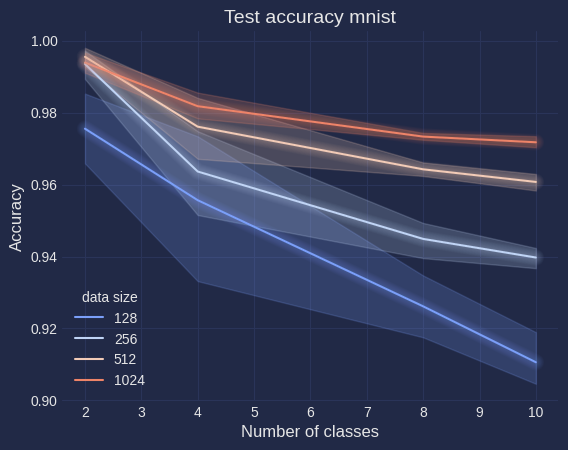

In [11]:
# plot test accuracy as a function of num_cls_per_task
# with hue line as size, average over the seed, and with 
# std plot
sns.lineplot(data=df, x='num_cls_per_task', y='test_acc', hue='data size',
palette=sns.color_palette("coolwarm", n_colors=4), estimator='mean', errorbar='ci');
plt.title(f"Test accuracy {dataset_name}", fontsize=14);
plt.xlabel("Number of classes", fontsize=12);
plt.ylabel("Accuracy", fontsize=12)
mplcyberpunk.make_lines_glow();

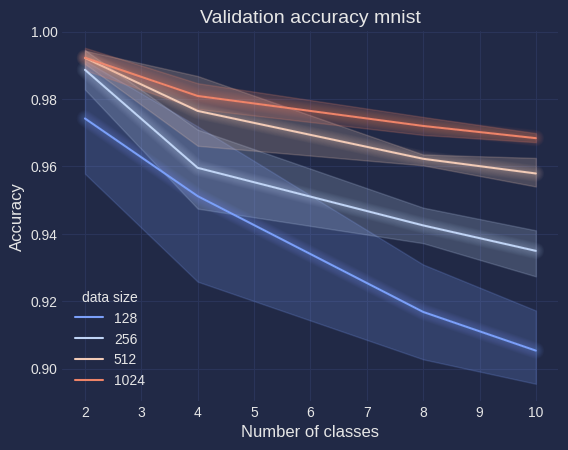

In [12]:
sns.lineplot(data=df, x='num_cls_per_task', y='val_acc', hue='data size',
palette=sns.color_palette("coolwarm", n_colors=4), estimator='mean', errorbar='ci',);
plt.title(f"Validation accuracy {dataset_name}", fontsize=14);
plt.xlabel("Number of classes", fontsize=12);
plt.ylabel("Accuracy", fontsize=12)
mplcyberpunk.make_lines_glow();